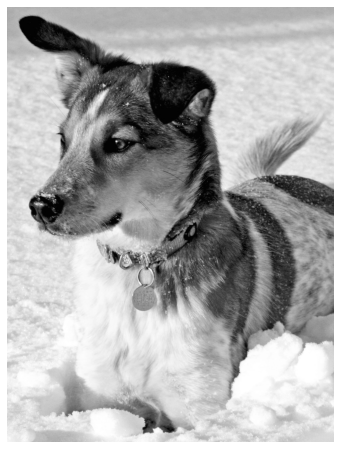

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os


#A = imread(os.path.join('..','DATA','dog.jpg'))
A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

0.000327775107717561
0.000950118140776892
0.0020723574301226033
0.014511711030604096
[0.00032778 0.00095012 0.00207236 0.01451171]
[   2.    4.   10. 1000.]


Text(0.5, 1.0, 'Compression Error')

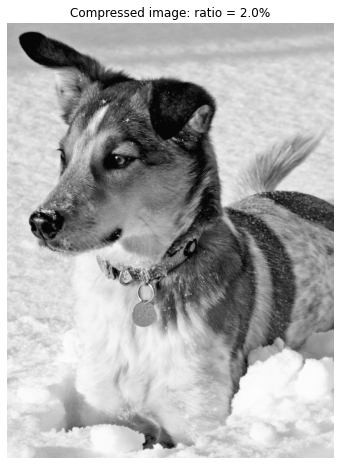

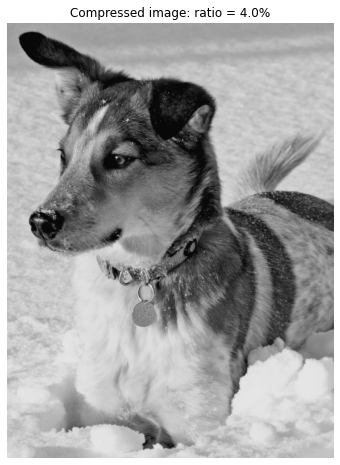

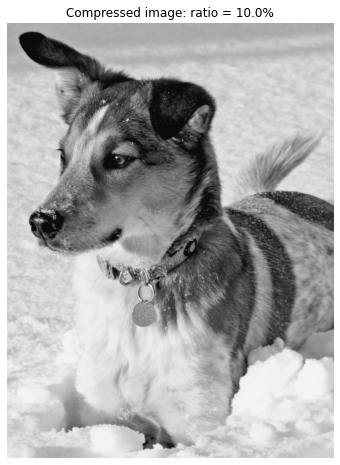

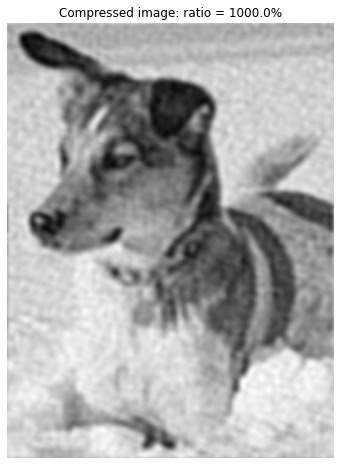

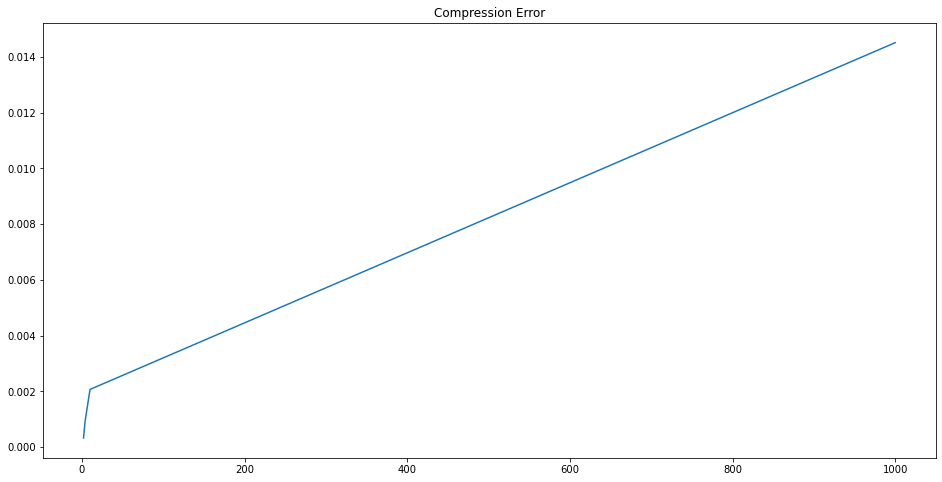

In [12]:
#Fourier Transform the image
Xt=np.fft.fft2(X)  

#Sorting the frequency components so the low freq components remain closer to origin and higher components go far 
Xtsort=np.sort(np.abs(Xt.reshape(-1)))

#Two list, error and compression ratio
error=np.array([])
com_ratio=np.array([])

# Compression Algorithm
for keep in (0.5, 0.25, 0.1, 0.001):
    thrshld= Xtsort[int(np.floor((1-keep)*len(Xtsort)))]
    index = np.abs(Xt)>thrshld
    Btlow = Xt*index
    Blow = np.fft.ifft2(Btlow).real #Going back to image domain using inverse Fourier Transform
    plt.figure()
    plt.imshow(Blow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: ratio = ' +str(100/(keep*100))+ '%')
    err=np.linalg.norm(X-Blow,ord=2) / np.linalg.norm(X,ord=2)
    print(err)
    error = np.append(error, err)
    ratio=1/(keep)
    com_ratio=np.append(com_ratio, ratio)

print(error)
print(com_ratio)
plt.figure()
plt.plot(com_ratio,error)
plt.show
plt.title('Compression Error')
